In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the CSV file
df = pd.read_csv("C:\\Users\\Bishwash Chhetri\\Desktop\\ineubytes\\index.csv")

In [6]:
# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Set up the plotting style
plt.style.use('default')

# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Payment Methods Distribution')

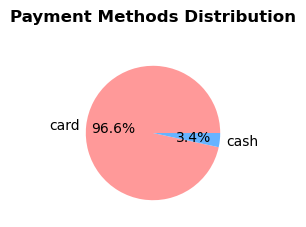

In [7]:
# 1. Payment Methods Distribution (Pie Chart)
plt.subplot(2, 2, 1)
payment_dist = df['cash_type'].value_counts()
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Payment Methods Distribution', pad=20, fontsize=12, fontweight='bold')

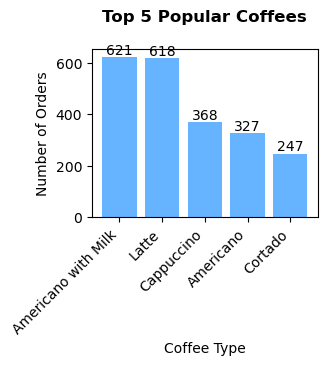

In [9]:
# 2. Top 5 Popular Coffees (Bar Chart)
plt.subplot(2, 2, 2)
coffee_counts = df['coffee_name'].value_counts().head()
bars = plt.bar(range(len(coffee_counts)), coffee_counts.values, color='#66b3ff')
plt.xticks(range(len(coffee_counts)), coffee_counts.index, rotation=45, ha='right')
plt.title('Top 5 Popular Coffees', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Orders')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

C:\Users\Bishwash Chhetri\AppData\Local\Temp\ipykernel_23780\3829682501.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


[Text(0, -200.0, '$-200'),
 Text(0, 0.0, '$0'),
 Text(0, 200.0, '$200'),
 Text(0, 400.0, '$400'),
 Text(0, 600.0, '$600'),
 Text(0, 800.0, '$800'),
 Text(0, 1000.0, '$1,000')]

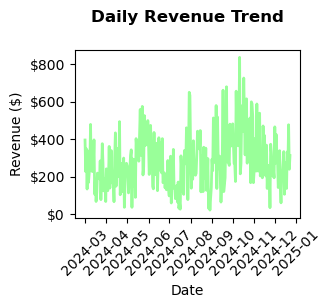

In [10]:
# 3. Daily Revenue Trend (Line Plot)
plt.subplot(2, 2, 3)
daily_revenue = df.groupby('date')['money'].sum().reset_index()
plt.plot(daily_revenue['date'], daily_revenue['money'], color='#99ff99', linewidth=2)
plt.title('Daily Revenue Trend', pad=20, fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Revenue ($)')

# Format y-axis as currency
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

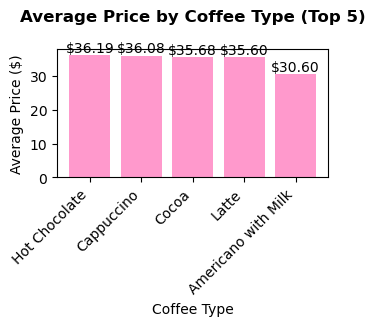


Coffee Sales Analysis


In [13]:
# 4. Average Order Value by Coffee Type (Bar Chart)
plt.subplot(2, 2, 4)
avg_price = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False).head()
bars = plt.bar(range(len(avg_price)), avg_price.values, color='#ff99cc')
plt.xticks(range(len(avg_price)), avg_price.index, rotation=45, ha='right')
plt.title('Average Price by Coffee Type (Top 5)', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Coffee Type')
plt.ylabel('Average Price ($)')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print Analysis Results
print("\nCoffee Sales Analysis")
print("=" * 50)

In [14]:
# 1. Basic Statistics
print("\nBasic Statistics:")
print("-" * 50)
print(f"Total Transactions: {len(df):,}")
print(f"Total Revenue: ${df['money'].sum():,.2f}")
print(f"Average Transaction Value: ${df['money'].mean():.2f}")
print(f"Median Transaction Value: ${df['money'].median():.2f}")


Basic Statistics:
--------------------------------------------------
Total Transactions: 2,623
Total Revenue: $83,646.10
Average Transaction Value: $31.89
Median Transaction Value: $32.82


In [15]:
# 2. Hourly Analysis
df['hour'] = df['datetime'].dt.hour
hourly_transactions = df.groupby('hour').size()
hourly_revenue = df.groupby('hour')['money'].sum()

print("\nPeak Hours Analysis:")
print("-" * 50)
print(f"Busiest Hour: {hourly_transactions.idxmax()}:00 with {hourly_transactions.max():,} transactions")
print(f"Highest Revenue Hour: {hourly_revenue.idxmax()}:00 with ${hourly_revenue.max():,.2f}")


Peak Hours Analysis:
--------------------------------------------------
Busiest Hour: 10:00 with 261 transactions
Highest Revenue Hour: 10:00 with $8,293.54


In [16]:
# 3. Payment Method Analysis
print("\nPayment Method Analysis:")
print("-" * 50)
payment_stats = df.groupby('cash_type').agg({
    'money': ['count', 'sum', 'mean']
}).round(2)
payment_stats.columns = ['Total Transactions', 'Total Revenue', 'Average Transaction']
print(payment_stats)


Payment Method Analysis:
--------------------------------------------------
           Total Transactions  Total Revenue  Average Transaction
cash_type                                                        
card                     2534        80460.1                31.75
cash                       89         3186.0                35.80


In [17]:
# 4. Top Selling Coffee Analysis
print("\nTop 5 Selling Coffees:")
print("-" * 50)
coffee_analysis = df.groupby('coffee_name').agg({
    'money': ['count', 'sum', 'mean']
}).round(2)
coffee_analysis.columns = ['Total Orders', 'Total Revenue', 'Average Price']
print(coffee_analysis.sort_values('Total Orders', ascending=False).head())


Top 5 Selling Coffees:
--------------------------------------------------
                     Total Orders  Total Revenue  Average Price
coffee_name                                                    
Americano with Milk           621       19004.54          30.60
Latte                         618       22001.66          35.60
Cappuccino                    368       13278.06          36.08
Americano                     327        8546.30          26.14
Cortado                       247        6366.66          25.78


In [18]:
# 5. Weekly Analysis
df['weekday'] = df['date'].dt.day_name()
weekly_analysis = df.groupby('weekday')['money'].agg(['count', 'sum', 'mean'])
weekly_analysis.columns = ['Total Orders', 'Total Revenue', 'Average Order Value']
print("\nWeekly Analysis:")
print("-" * 50)
print(weekly_analysis.round(2))


Weekly Analysis:
--------------------------------------------------
           Total Orders  Total Revenue  Average Order Value
weekday                                                    
Friday              365       11650.42                31.92
Monday              383       12265.42                32.02
Saturday            374       11825.14                31.62
Sunday              359       11499.46                32.03
Thursday            374       11947.34                31.94
Tuesday             432       13861.90                32.09
Wednesday           336       10596.42                31.54


In [19]:
# Save analysis to a file
with open('coffee_sales_analysis.txt', 'w') as f:
    f.write("Coffee Sales Analysis Report\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("Basic Statistics:\n")
    f.write("-" * 50 + "\n")
    f.write(f"Total Transactions: {len(df):,}\n")
    f.write(f"Total Revenue: ${df['money'].sum():,.2f}\n")
    f.write(f"Average Transaction Value: ${df['money'].mean():.2f}\n")
    f.write(f"Median Transaction Value: ${df['money'].median():.2f}\n\n")
    
    f.write("Payment Method Analysis:\n")
    f.write("-" * 50 + "\n")
    f.write(payment_stats.to_string() + "\n\n")
    
    f.write("Top 5 Selling Coffees:\n")
    f.write("-" * 50 + "\n")
    f.write(coffee_analysis.sort_values('Total Orders', ascending=False).head().to_string() + "\n\n")
    
    f.write("Weekly Analysis:\n")
    f.write("-" * 50 + "\n")
    f.write(weekly_analysis.round(2).to_string())
